<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>
    
Thank you for the updates! My new comments have digit 2. 
    
    
I do not have any questions, so I can accept the project now. 
    
    
If you are interested in this topic, please take a look at the small [Time Series Course](https://www.kaggle.com/learn/time-series) on Kaggle. There are just several lessons there, and in the end of this course you will apply your knowledge on the sales dataset that is provided for the ongoing [Store Sales Time Series Forecasting Competition](https://www.kaggle.com/competitions/store-sales-time-series-forecasting) with no rewards except for knowledge :) You can use their dataset for your practice and you can submit your notebook to run the model on the hidden test subset.     
    
    
Congratulations and good luck! 
    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi George! I am a reviewer on this project. Congratulations on submitting time series project! 🎉
    

I will be using the standard color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved.
    
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review if you ask me to. 
   
    
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for submitting the project! You did a fantastic job here, and I hope you enjoyed this topic. You have successfully trained several models and analyzed time series, which is great! However, there're a couple of issues that need your attention. Would you take a look at my comments? 
    

<hr>
    
📌 Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 


</div>

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

Don't forget about project title :) 

</div>

## Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [2]:
taxi_data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
taxi_data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [5]:
display(taxi_data)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [6]:
# Making sure time series is in order
taxi_data.sort_index(inplace=True)

In [7]:
# Checking for nulls
taxi_data.isna().sum()

num_orders    0
dtype: int64

In [8]:
# Checking for duplicates
taxi_data[taxi_data.duplicated()]

,num_orders
datetime,
2018-03-01 02:10:00,12
2018-03-01 02:20:00,19
2018-03-01 03:00:00,8
2018-03-01 03:10:00,17
2018-03-01 03:20:00,7
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


Duplicates make sense since they should be at different times

In [9]:
# Resampling by hour
hourly_data = taxi_data.resample('H').sum()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Resampling is correct! 
    
</div>

In [10]:
hourly_data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [11]:
# Creating seasonality
decomposed = seasonal_decompose(hourly_data)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
`seasonal_decompose` is a great method, well done! 
    
</div>

## Analysis

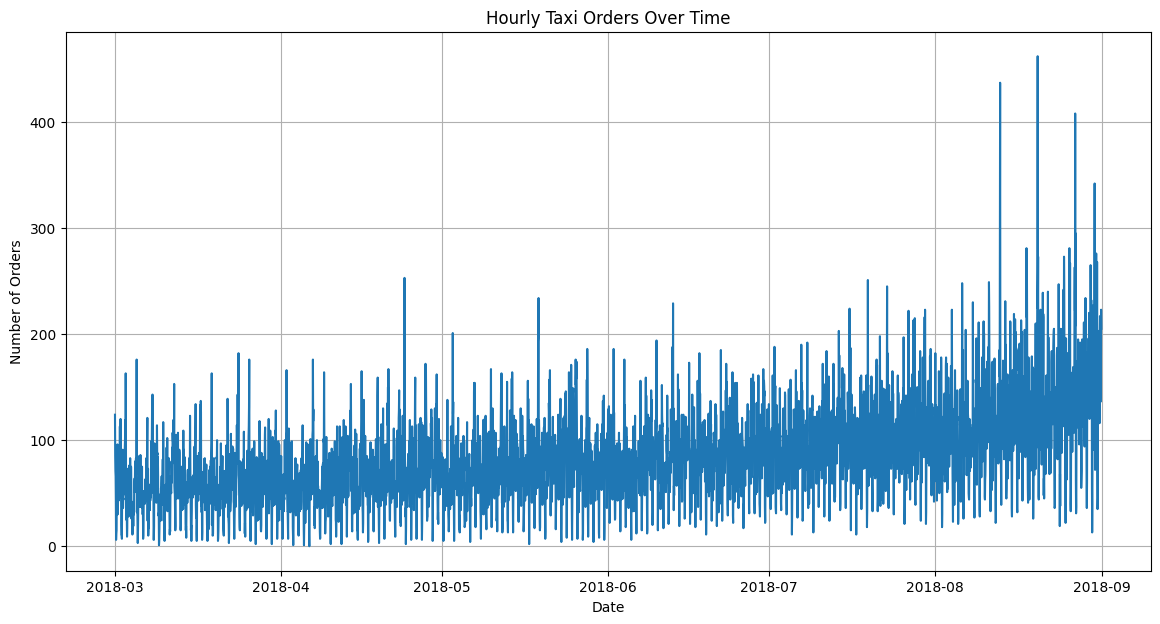

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(hourly_data.index, hourly_data['num_orders'], label='Hourly Taxi Orders')
plt.title('Hourly Taxi Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Nice chart! 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
The legend can be disabled. 



</div>

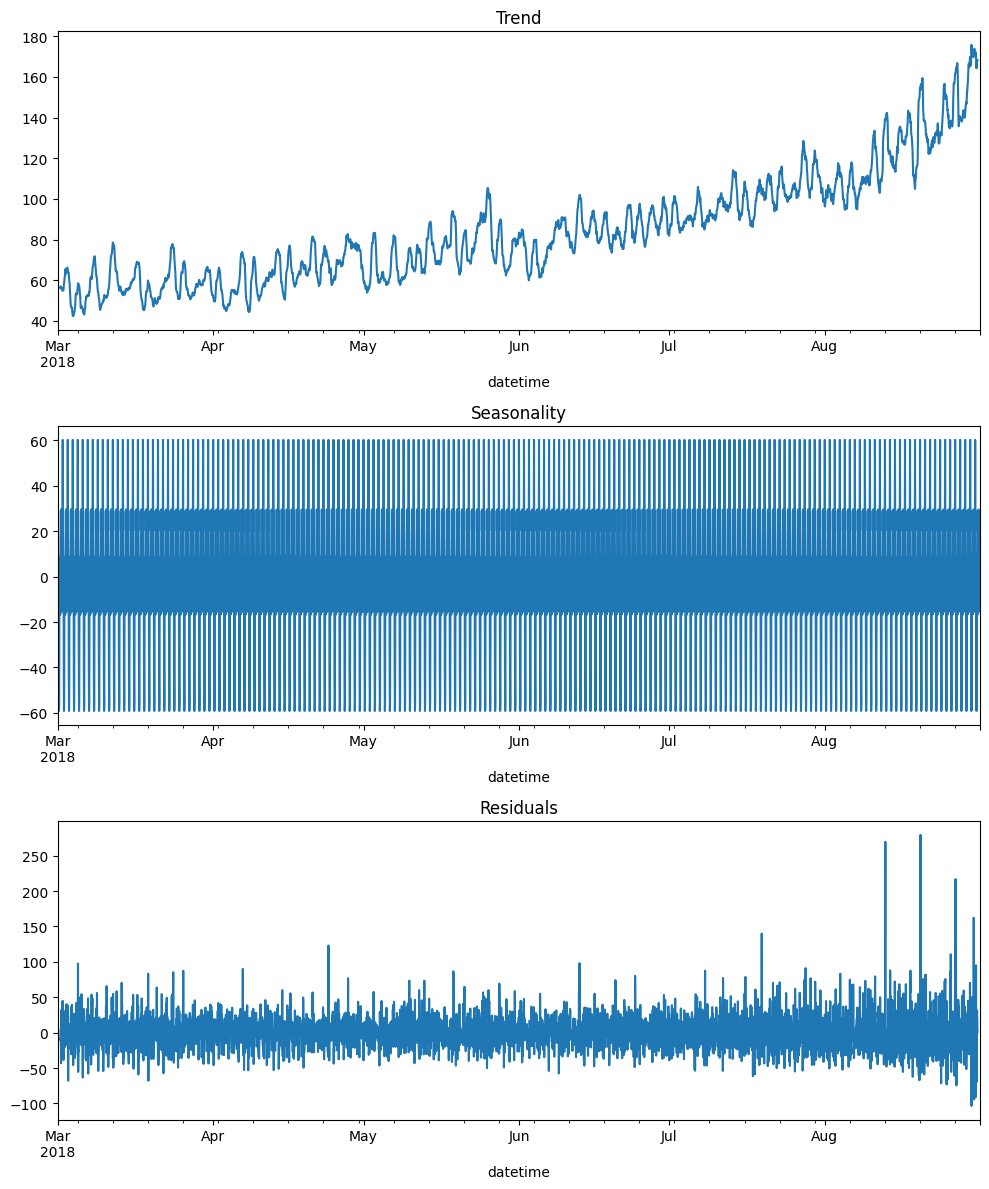

In [13]:
plt.figure(figsize=(10, 12))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

<AxesSubplot:xlabel='datetime'>

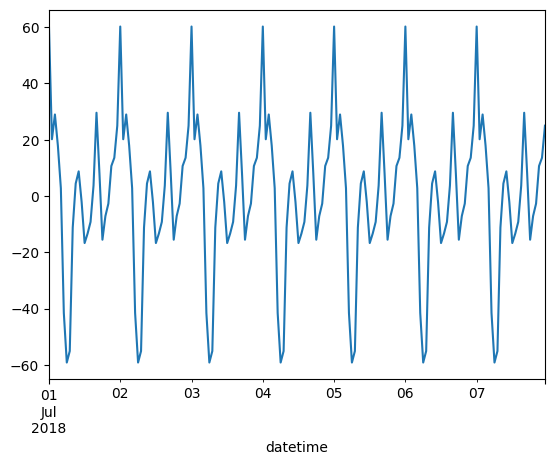

In [14]:
decomposed.seasonal['2018-07-01':'2018-07-07'].plot()

<AxesSubplot:xlabel='datetime'>

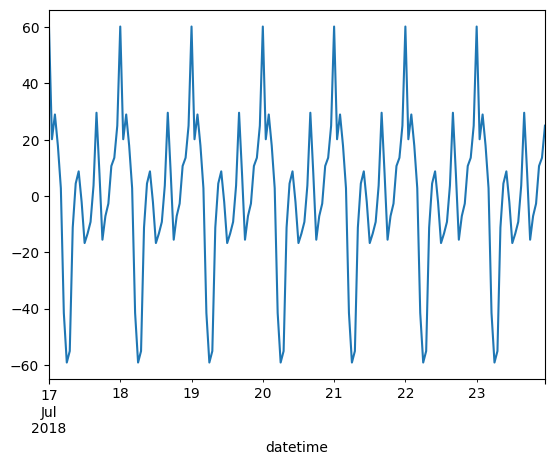

In [15]:
decomposed.seasonal['2018-07-17':'2018-07-23'].plot()

We can see that there is definitely seasonality in the data when its broken down by weeks 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Yes, we may have an intraday seasonality, which makes sense in such dataset.    
</div>

## Training

In [16]:
train_all, test = train_test_split(hourly_data, shuffle=False, test_size=0.1)
train, valid = train_test_split(train_all, shuffle=False, test_size=0.1)

In [17]:
df_stationarityTest = adfuller(train_all, autolag='AIC')
print("P-value: ", df_stationarityTest[1])

P-value:  0.0007322730527364293


Since the p-value is less than 0.05 its more likely that the data set is stationary

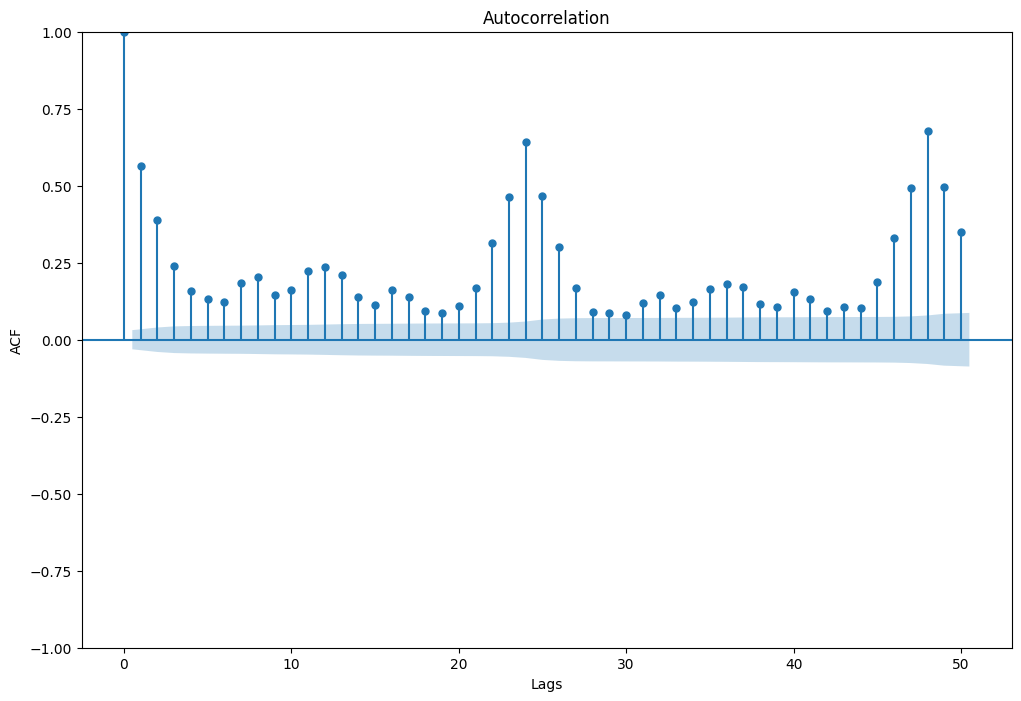

In [18]:
lags_to_check = 50
pacf = plot_acf(x=train_all, lags=lags_to_check)
pacf.set_figheight(8)
pacf.set_figwidth(12)
plt.xlabel("Lags")
plt.ylabel("ACF")
plt.show()

The ACF plot results shows correlations at lag 1 and periodic spikes at lags 12, and 24. This also shows a seasonal pattern as well as autoregressive behavior since the spikes occur at 12 lag intervals. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment  </b>
    

Please add a conclusion here. What can be inferred from the chart above?
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Good! 

</div>

In [19]:
# Feature engineering
def create_features(taxi_data, max_lag, rolling_mean_size):
    taxi_data['day'] = taxi_data.index.day
    taxi_data['dayofweek'] = taxi_data.index.dayofweek
    taxi_data['hours'] = taxi_data.index.hour
    
    for lag in range(1, max_lag + 1):
        taxi_data[f'lag_{lag}'] = taxi_data['num_orders'].shift(lag)
    
    taxi_data['rolling_mean'] = taxi_data['num_orders'].shift().rolling(rolling_mean_size).mean()
    taxi_data = taxi_data.dropna()
    feature_data = taxi_data.drop(['num_orders'], axis=1)
    target_data = taxi_data['num_orders']
    return feature_data, target_data


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct. Sometimes we can notice autocorrelation in time series. It means that the current value of the series depends on the previous values. Including so-called lag components allows machine learning models, such as linear regression, to take this dependency into account.
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
However, will year be helpful given we have only one year in the data? :) This feature will not provide any useful information for the model and can lead to redundancy and increased computation time. The same can be said about month, so you can exclude them.

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Well done! 
</div>

In [20]:
train_lr = train.copy()
valid_lr = valid.copy()
test_lr = test.copy()

In [21]:
feature_train_lr, target_train_lr = create_features(train_lr, 24, 24)
feature_valid_lr, target_valid_lr = create_features(valid_lr, 24, 24)
feature_test_lr, target_test_lr = create_features(test_lr, 24, 24)

In [22]:
tscv = TimeSeriesSplit(n_splits=5)

# Defined the model and hyperparameters for Ridge regression
ridge = Ridge()
param_grid = {
    'alpha': [0.1, 1, 10, 50, 100], 
}

# GridSearchCV with TimeSeriesSplit
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(feature_train_lr, target_train_lr)

# Best model from GridSearch
best_ridge = grid_search.best_estimator_

# Evaluated on the validation set
predict_ridge = best_ridge.predict(feature_valid_lr)
ridge_mse_val = mean_squared_error(target_valid_lr, predict_ridge)
print("Best Ridge RMSE:", ridge_mse_val**0.5)
print("Best Parameters:", grid_search.best_params_)


Best Ridge RMSE: 34.329692590075496
Best Parameters: {'alpha': 100}


In [23]:
model_arima = ARIMA(train, order=(5,1,3))
model_arima = model_arima.fit()

start_value = len(train)  
end_value = len(train) + len(valid) - 1  

arima_predict = model_arima.predict(start=start_value, end=end_value, dynamic=False)
arima_mse = mean_squared_error(valid, arima_predict)
print("RMSE:", arima_mse**0.5)

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 46.66657269409841


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Good!     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Please try to implement hyperparameter tuning for at least one of the models. For this purpose, we either need to split data into three subsets or use cross-validation. If you choose the second option, please do not forget about the correct order in the data. In order to use the `GridSearchCV` method correctly, we have to employ the `TimeSeriesSplit` class, a cross-validator for time series.  
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Good. You can also tune it for ARIMA or even try Forest here. 
</div>

## Testing

In [24]:

# The best Ridge model from GridSearchCV
best_ridge = Ridge(alpha=100)  # Use the best alpha from tuning
best_ridge.fit(feature_train_lr, target_train_lr)  # Train on the training data

# Prediction on the test set
predict_ridge_test = best_ridge.predict(feature_test_lr)

# Calculated RMSE on the test set
ridge_mse_test = mean_squared_error(target_test_lr, predict_ridge_test)
ridge_rmse_test = ridge_mse_test**0.5

print("Ridge RMSE on Test Set:", ridge_rmse_test)


Ridge RMSE on Test Set: 45.444289906216184


# Conclusion

After evaluating different models for predicting taxi orders, the results indicate that the Ridge regression model is the most effective and reliable approach. Tuned with the optimal parameter (alpha=100), the model achieved a validation RMSE of 34.33 and a test RMSE of 45.44. Although there is a slight increase in error on the test set, the model's performance remains within the acceptable range of 48. This result highlights the effectiveness of Ridge regression, making it a reliable approach for predicting taxi orders. 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
We usually test one model :)    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Please don't forget about the general conclusion. What has been done and what can be inferred from the results? 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Great! 
</div>

# Review checklist

## - [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48